# Stellar Classification Dataset - SDSS17

In diesem Projekt arbeite ich mit dem Stellar Classification Dataset - SDSS17, das 100.000 Beobachtungen aus dem Sloan Digital Sky Survey (SDSS) enthält. Das Ziel ist es, ein Machine Learning Modell zu entwickeln, das basierend auf spektralen Merkmalen automatisch Sterne, Galaxien und Quasare klassifizieren kann.

## Warum dieser Datensatz?

Der Datensatz ist besonders interessant, weil die Klassifikation von Himmelsobjekten eine spannende Anwendung für Machine Learning darstellt. Hierbei analysiere ich, welche Faktoren eine Rolle spielen, um Sterne, Galaxien und Quasare voneinander zu unterscheiden.

Der Datensatz bietet:
- Reale astronomische Beobachtungen zur Kategorisierung von Objekten im Universum.
- Eine wissenschaftlich relevante Basis für Supervised Learning (Klassifikation).
- Die Möglichkeit, astronomische Muster durch Clustering oder Anomalieerkennung zu entdecken.

## Datensatzbeschreibung

Der Stellar Classification Dataset - SDSS17 enthält 100.000 Beobachtungen mit 18 Spalten. Die wichtigsten Felder sind:

- **obj_ID**: Einzigartige ID für jedes Objekt in der SDSS-Datenbank.
- **alpha, delta**: Himmelskoordinaten (Rektaszension & Deklination).
- **u, g, r, i, z**: Helligkeitswerte in verschiedenen Spektralbändern.
- **class**: Zielvariable (Stern, Galaxie, Quasar).
- **redshift**: Mass für die Rotverschiebung, gibt Hinweise auf die Entfernung.
- **plate, MJD, fiber_ID**: Technische Identifikatoren für die Beobachtung.

Der Datensatz enthält keine persönlichen Daten und wurde ausschliesslich für wissenschaftliche Zwecke erhoben.

# Teil 2: Datenvorbereitung

In diesem Abschnitt werde ich die Daten für die maschinelle Verarbeitung vorbereiten und die relevanten Informationen zusammentragen.

## 2.1 Für welches Daten-Feld möchten Sie Vorhersagen treffen können?

Ich habe das Feld **'class'** als Zielvariable für die Klassifikation gewählt. Diese Variable gibt an, ob ein Objekt ein **Stern**, eine **Galaxie** oder ein **Quasar** ist. Das Ziel ist es, ein Machine Learning Modell zu entwickeln, das in der Lage ist, diese Klassen automatisch anhand der spektralen Merkmale (wie 'u', 'g', 'r', 'i', 'z') zu bestimmen.

## 2.2 Bestimmen Sie für jedes Feld einige relevante statistische Informationen

Ich werde nun für jedes numerische Feld die wichtigsten statistischen Kennzahlen wie Median, Standardabweichung und Interquartilsabstand berechnen. Hierzu verwende ich die Methode `describe()` von Pandas.

Diese statistischen Kennzahlen geben mir eine gute Übersicht über die Verteilung der Daten und helfen mir, die Variabilität und Verteilung besser zu verstehen.

In [5]:
import pandas as pd

# Laden des Datensatzes
df = pd.read_csv('star_classification.csv') #Hier den richtigen Pfad eingeben, wo die star_classification.csv-Datei liegt

# Berechnen von Median, Durchschnitt, Standardabweichung und IQR für jedes numerische Feld
stats = df.describe().transpose()
stats['IQR'] = stats['75%'] - stats['25%']
stats[['mean', 'std', '50%', 'IQR']]

,mean,std,50%,IQR
obj_ID,1.237665e+18,8.438560e+12,1.237663e+18,9.189091e+12
alpha,1.776291e+02,9.650224e+01,1.809007e+02,1.063768e+02
delta,2.413530e+01,1.964467e+01,2.364592e+01,3.475478e+01
u,2.198047e+01,3.176929e+01,2.217914e+01,3.335088e+00
g,2.053139e+01,3.175029e+01,2.109983e+01,3.158538e+00
r,1.964576e+01,1.854760e+00,2.012529e+01,2.908957e+00
i,1.908485e+01,1.757895e+00,1.940514e+01,2.664210e+00
z,1.866881e+01,3.172815e+01,1.900460e+01,2.460442e+00
run_ID,4.481366e+03,1.964765e+03,4.188000e+03,2.139000e+03
rerun_ID,3.010000e+02,0.000000e+00,3.010000e+02,0.000000e+00


## 2.3 Erstellen Sie mindestens eine Grafik

Für die Visualisierung werde ich ein Histogramm der Helligkeitswerte im **Ultraviolett-Bereich (u)** erstellen:


Zusätzlich könnte ich auch eine Regression zwischen den Helligkeitswerten in den Bändern **'u'** und **'g'** erstellen:

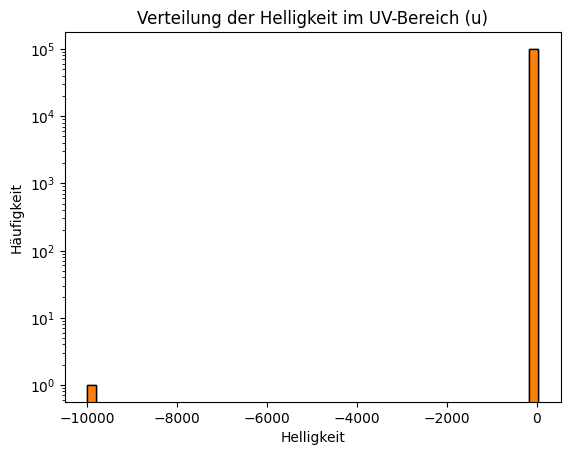

In [8]:
import matplotlib.pyplot as plt

# Histogramm für das Feld 'u' (Ultraviolett)
plt.hist(df['u'], bins=50, edgecolor='black')
plt.title('Verteilung der Helligkeit im UV-Bereich (u)')
plt.xlabel('Helligkeit')
plt.ylabel('Häufigkeit')
plt.show

plt.hist(df['u'], bins=50, edgecolor='black')
plt.title('Verteilung der Helligkeit im UV-Bereich (u)')
plt.xlabel('Helligkeit')
plt.ylabel('Häufigkeit')
plt.yscale('log')  # Logarithmische Skala, um Ausreisser zu dämpfen
plt.show()

In [ ]:
Zusätzlich könnte ich auch eine Regression zwischen den Helligkeitswerten in den Bändern **'u'** und **'g'** erstellen:

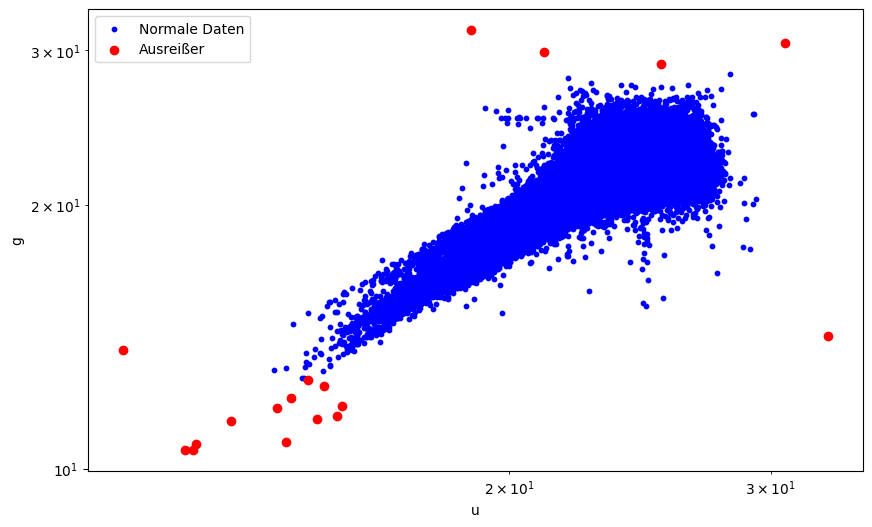

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

def calculate_iqr(series):
    """Berechnet den Interquartilsabstand einer Serie."""
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    return Q1, Q3, Q3 - Q1

def identify_outliers(df, column, Q1, Q3, IQR, multiplier=1.5):
    """Identifiziert Ausreisser in einer DataFrame-Spalte basierend auf dem IQR."""
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Berechnung des IQR für 'u' und 'g'
Q1_u, Q3_u, IQR_u = calculate_iqr(df['u'])
Q1_g, Q3_g, IQR_g = calculate_iqr(df['g'])

# Bestimmung der Ausreisser für 'u' und 'g' 
outliers_u = identify_outliers(df, 'u', Q1_u, Q3_u, IQR_u, multiplier=2)
outliers_g = identify_outliers(df, 'g', Q1_g, Q3_g, IQR_g, multiplier=2)
outliers = pd.concat([outliers_u, outliers_g]).drop_duplicates()

# Normale Daten ohne Ausreisser
normal_data = df.drop(outliers.index)

# Visualisierung der Ausreisser und normalen Daten
plt.figure(figsize=(10, 6))
plt.scatter(normal_data['u'], normal_data['g'], color='blue', s=10, label="Normale Daten")
plt.scatter(outliers['u'], outliers['g'], color='red', label="Ausreißer")
plt.xlabel('u')
plt.ylabel('g')

# Logarithmische Skalierung für bessere Darstellung
plt.xscale('log')
plt.yscale('log')

plt.legend()
plt.show()



## 2.4 Skalierung des Datensatzes

Ich werde das Feld **'u'** (Helligkeit im UV-Bereich) mit der **Min-Max-Skalierung** transformieren, damit alle Werte im gleichen Bereich liegen:

In [21]:
from sklearn.preprocessing import MinMaxScaler

# Skalierung des Feldes 'u'
scaler = MinMaxScaler()
df['u_scaled'] = scaler.fit_transform(df[['u']])

# Überprüfen der Skalierung
df[['u', 'u_scaled']].head()

,u,u_scaled
0,23.87882,0.999113
1,24.77759,0.999202
2,25.26307,0.999251
3,22.13682,0.998939
4,19.43718,0.998670
